### Data Loading

In [90]:
# ライブラリを読み込む
import pandas as pd

# データの読み込み
data = pd.read_csv('Disease_symptom_and_patient_profile_dataset.csv')

In [92]:
# 特徴量の列名をそれぞれ確認する
print(data.columns)

Index(['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Age',
       'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable'],
      dtype='object')


In [94]:
# データの確認
print(data.head())

       Disease Fever Cough Fatigue Difficulty Breathing  Age  Gender  \
0    Influenza   Yes    No     Yes                  Yes   19  Female   
1  Common Cold    No   Yes     Yes                   No   25  Female   
2       Eczema    No   Yes     Yes                   No   25  Female   
3       Asthma   Yes   Yes      No                  Yes   25    Male   
4       Asthma   Yes   Yes      No                  Yes   25    Male   

  Blood Pressure Cholesterol Level Outcome Variable  
0            Low            Normal         Positive  
1         Normal            Normal         Negative  
2         Normal            Normal         Negative  
3         Normal            Normal         Positive  
4         Normal            Normal         Positive  


In [96]:
# 甲状腺機能亢進に関連するデータをフィルタリング
hyperthyroidism_data = data[data['Disease'] == 'Hyperthyroidism']

In [98]:
# フィルタリングされたデータの確認 以後フィルタリング後のデータフレームを用いて分析を進める
print(hyperthyroidism_data.head())

            Disease Fever Cough Fatigue Difficulty Breathing  Age  Gender  \
8   Hyperthyroidism    No   Yes      No                   No   28  Female   
9   Hyperthyroidism    No   Yes      No                   No   28  Female   
66  Hyperthyroidism   Yes   Yes     Yes                   No   35  Female   
81  Hyperthyroidism   Yes   Yes     Yes                   No   35    Male   
82  Hyperthyroidism   Yes   Yes     Yes                   No   35    Male   

   Blood Pressure Cholesterol Level Outcome Variable  
8          Normal            Normal         Negative  
9          Normal            Normal         Negative  
66         Normal            Normal         Negative  
81           High              High         Positive  
82           High              High         Positive  


### Setting the Target Variable

In [100]:
#　ターゲット変数の設定　（陽性または陰性）

#特徴量の設定（特徴量から目的変数を削除）
X = hyperthyroidism_data.drop('Outcome Variable', axis=1)
#ターゲット変数（目的変数）の設定                              
y = hyperthyroidism_data['Outcome Variable']

In [102]:
# 変数の確認
print(X.shape)
print(y.shape)

(7, 9)
(7,)


In [104]:
#データの前処理

#　欠損値の確認と処理（入力されていないデータを確認）
print(hyperthyroidism_data.isnull().sum())

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64


In [106]:
# データとデータ型の確認と変換
print(hyperthyroidism_data.dtypes)
print(hyperthyroidism_data)

Disease                 object
Fever                   object
Cough                   object
Fatigue                 object
Difficulty Breathing    object
Age                      int64
Gender                  object
Blood Pressure          object
Cholesterol Level       object
Outcome Variable        object
dtype: object
             Disease Fever Cough Fatigue Difficulty Breathing  Age  Gender  \
8    Hyperthyroidism    No   Yes      No                   No   28  Female   
9    Hyperthyroidism    No   Yes      No                   No   28  Female   
66   Hyperthyroidism   Yes   Yes     Yes                   No   35  Female   
81   Hyperthyroidism   Yes   Yes     Yes                   No   35    Male   
82   Hyperthyroidism   Yes   Yes     Yes                   No   35    Male   
134  Hyperthyroidism    No    No     Yes                   No   40    Male   
277  Hyperthyroidism    No    No     Yes                   No   60    Male   

    Blood Pressure Cholesterol Level Outcome Variab

### Encoding Categorical Data

In [108]:
# カテゴリカルデータのエンコーディング

# 順序をもつカテゴリカルデータを数値データに変換

# データのコピーを作成
hyperthyroidism_data_copy = hyperthyroidism_data.copy()

# Define the mapping dictionary for Blood Pressure
mapping_bp = {'Low' : 0, 'Normal' : 1, 'High' : 2 }

# Apply ordinal encoding to BP using .map
hyperthyroidism_data_copy['Blood Pressure'] = hyperthyroidism_data_copy['Blood Pressure'].map(mapping_bp)

# Define the mapping dectionary forCholesterol Level
mapping_cl = {'Low' : 0, 'Normal' : 1, 'High' : 2 }

# Apply ordinal encoding to CL using .map
hyperthyroidism_data_copy['Cholesterol Level'] = hyperthyroidism_data_copy['Cholesterol Level'].map(mapping_cl)

# 順序をもたないカテゴリカルデータを数値データに変換
hyperthyroidism_data_copy = pd.get_dummies(hyperthyroidism_data_copy, columns = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Gender', 'Outcome Variable'])

In [83]:
# データとデータ型の確認と変換
print(hyperthyroidism_data_copy.dtypes)
print(hyperthyroidism_data_copy)

Disease                      object
Age                           int64
Blood Pressure                int64
Cholesterol Level             int64
Fever_No                       bool
Fever_Yes                      bool
Cough_No                       bool
Cough_Yes                      bool
Fatigue_No                     bool
Fatigue_Yes                    bool
Difficulty Breathing_No        bool
Gender_Female                  bool
Gender_Male                    bool
Outcome Variable_Negative      bool
Outcome Variable_Positive      bool
dtype: object
             Disease  Age  Blood Pressure  Cholesterol Level  Fever_No  \
8    Hyperthyroidism   28               1                  1      True   
9    Hyperthyroidism   28               1                  1      True   
66   Hyperthyroidism   35               1                  1     False   
81   Hyperthyroidism   35               2                  2     False   
82   Hyperthyroidism   35               2                  2     False   
13

### Exploratory Data Analysis

In [110]:
# 基本統計量の確認
print(hyperthyroidism_data_copy.describe())

             Age  Blood Pressure  Cholesterol Level
count   7.000000        7.000000           7.000000
mean   37.285714        1.428571           1.428571
std    10.889051        0.534522           0.534522
min    28.000000        1.000000           1.000000
25%    31.500000        1.000000           1.000000
50%    35.000000        1.000000           1.000000
75%    37.500000        2.000000           2.000000
max    60.000000        2.000000           2.000000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

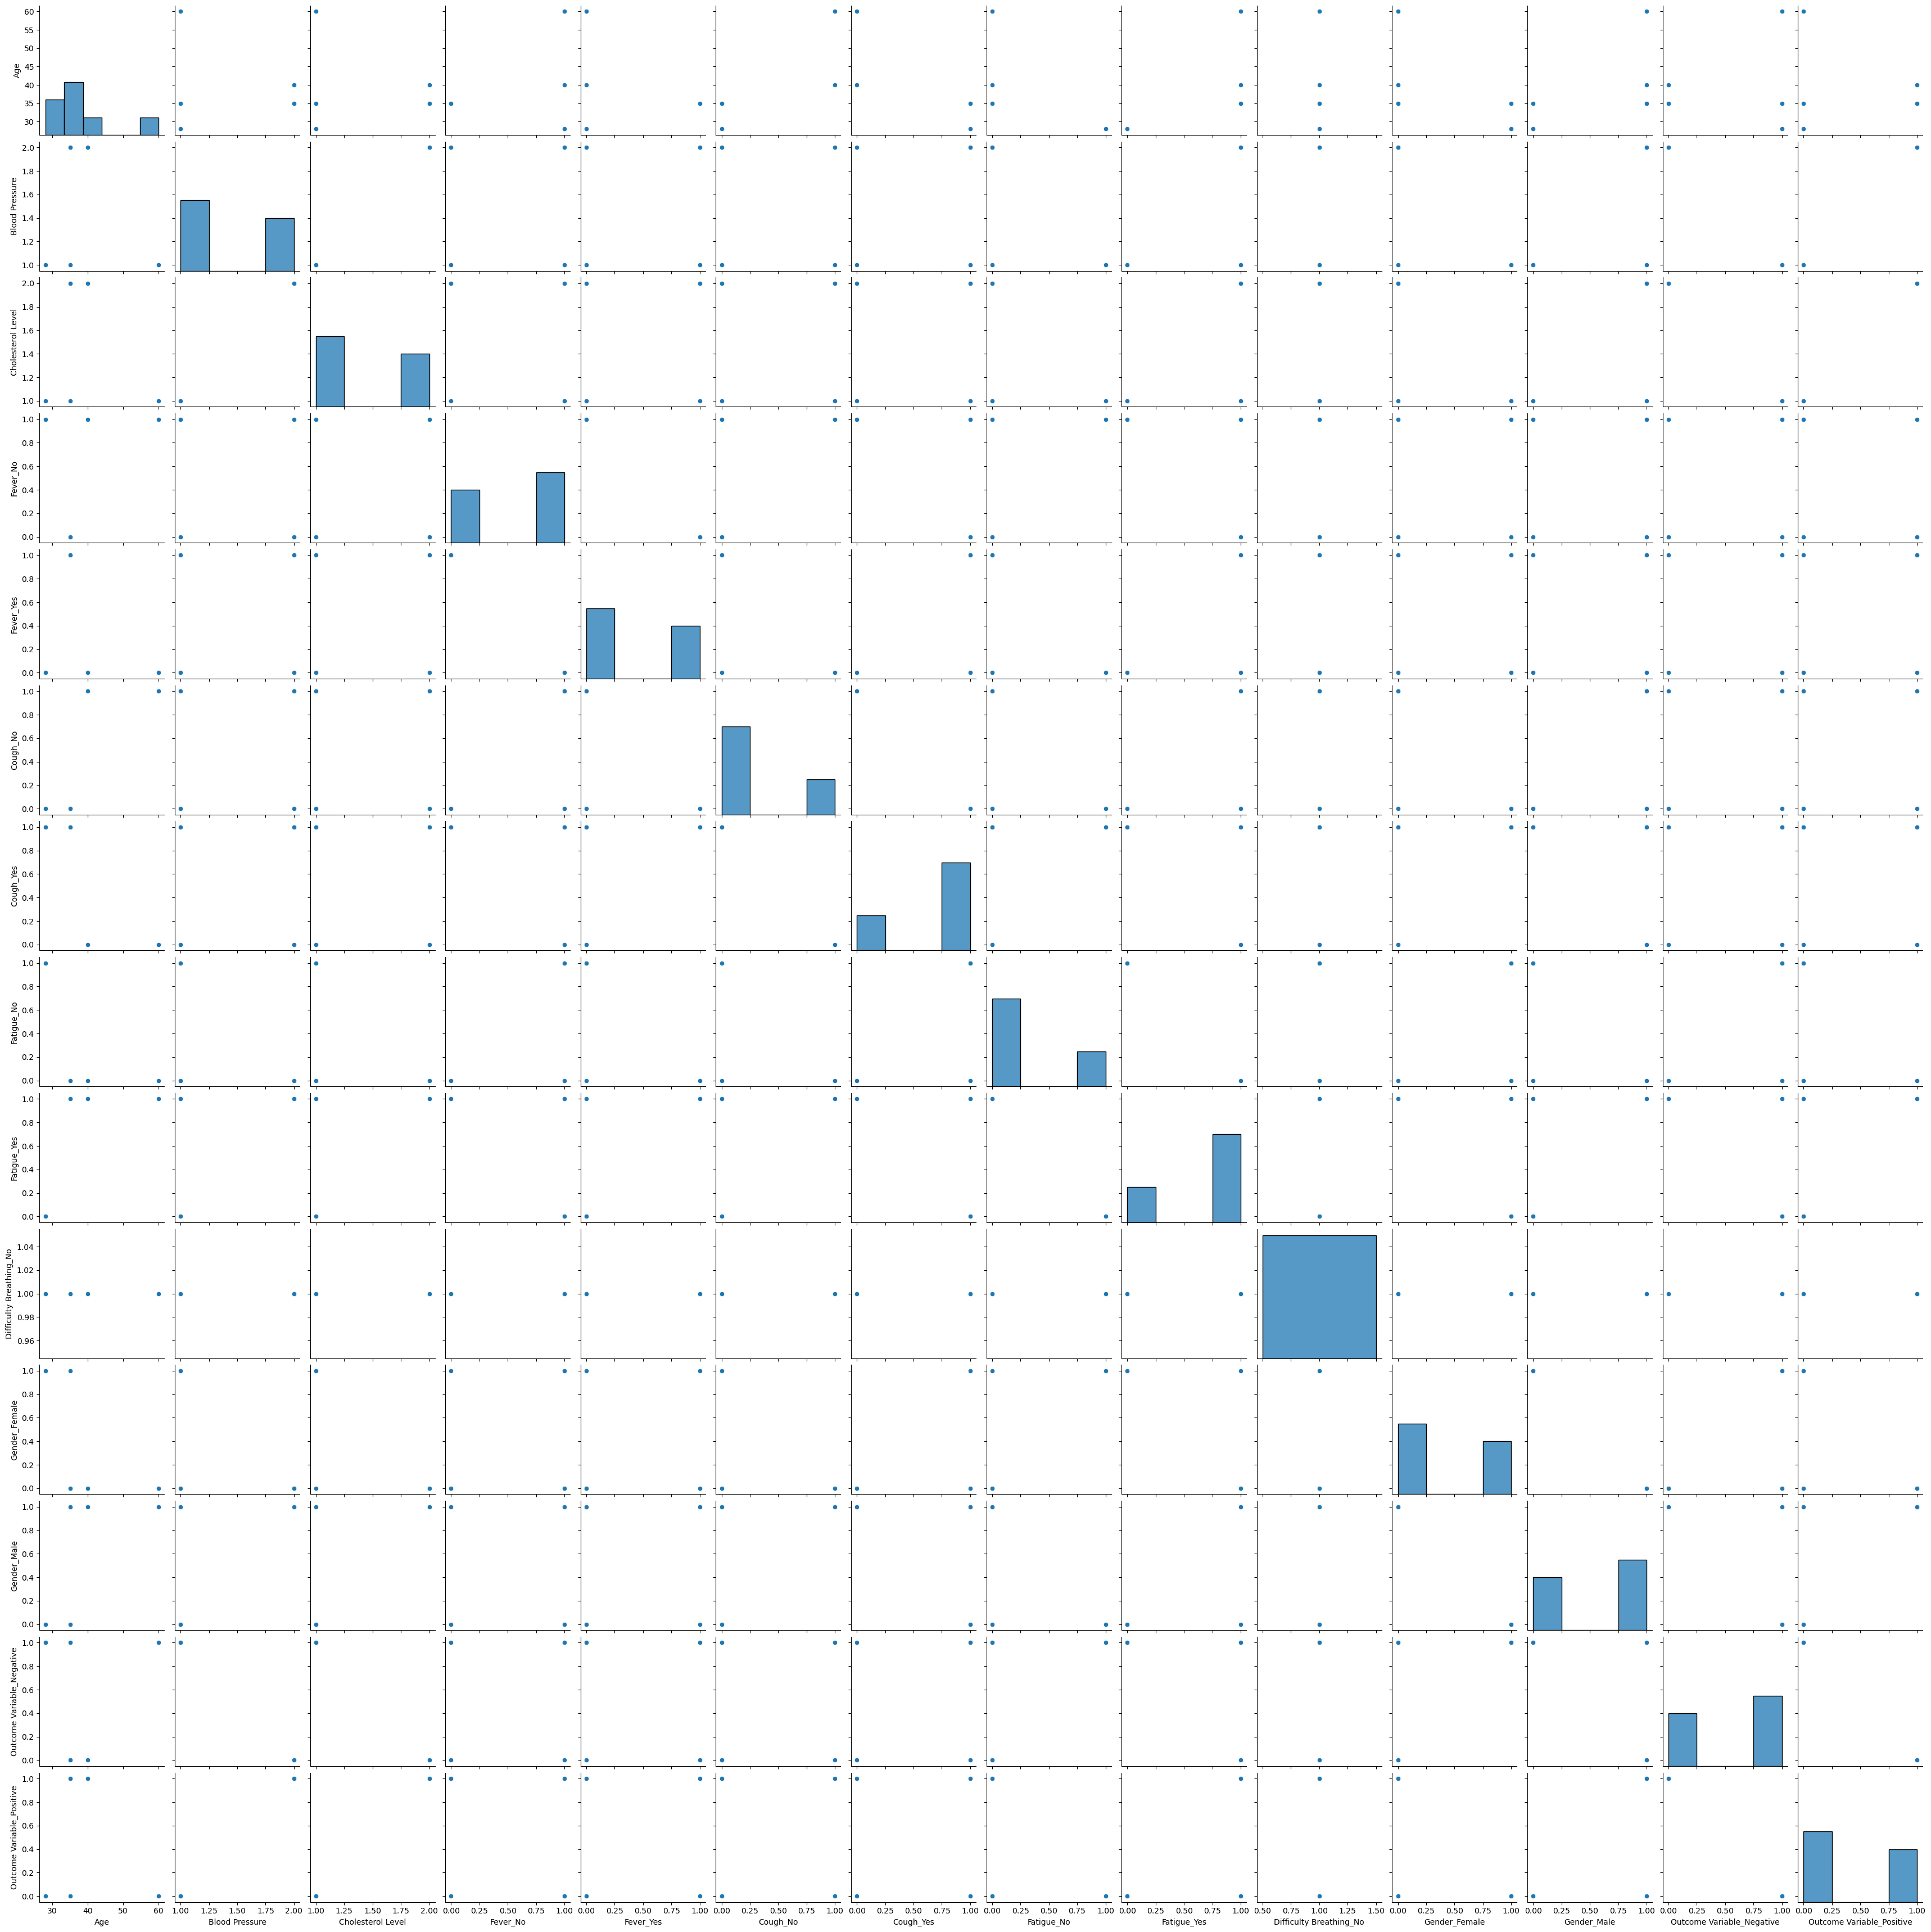

In [112]:
# データの可視化
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(hyperthyroidism_data_copy)
plt.show()

### Splitting the Data and Building the Model

In [126]:
# Xを代入し直す
X = hyperthyroidism_data_copy

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# 特徴量列からフィルタリングなどに使用していた病名列を削除
X = X.drop(columns=['Disease'])

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42 )

# モデルのインスタンスを作成
model = LogisticRegression()

# モデルの訓練
model.fit(X_train, y_train)

# テストデータを使って予測
y_pred = model.predict(X_test)

# モデルの精度を計算
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.0


In [134]:
# データの確認
print(f"Number of samples in X: {X.shape[0]}")
print(f"Number of samples in y: {y.shape[0]}")

Number of samples in X: 7
Number of samples in y: 7
